In [16]:
%load_ext autoreload
%autoreload 2

import numpy as np

import os as os

import argparse
from MPASDomainLib import *

_in_datafile  = "output_mean.nc"
_in_gridfile  = "wofs_mpas_01.init.nc"
_ou_filename  = "output_mean.quad.nc"

_wps_file = 'namelist.wps'

_xL = 900.e3
_nx = 300
_ny = 300

debug = 11

#=======================================================================================================

# Open input file, read cell centered coordinates

in_grid_file = _in_gridfile
in_data_file = _in_datafile
out_filename = _ou_filename

ds_data = xr.open_dataset(in_data_file)

ntimes = ds_data.Time.shape[0]

if debug > 100:
    calc_MPAS_new_grid( ds_grid )

# Most of the work in the main routine is setting up a new horizontal grid

xg, yg, zg, xC, yC, zC = calc_MPAS_new_grid(in_grid_file, wps_file =_wps_file, nx = _nx, ny = _ny, xL_grid = _xL, yL_grid = _xL)


new_grid = calc_MPAS_quad_grid( in_data_file, xC, yC, xg, yg, out_vars = output_variables, nearest = False )

write_MPAS_quad_netCDF( new_grid, xg, yg, zg, ntimes, out_filename )



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Wrote w
Wrote u
Wrote v
Wrote theta
Wrote surface_pressue
Wrote q2
Wrote t2m
Successfully wrote interpolated MPAS data to file:: output_mean.quad.nc 



AttributeError: module 'cartopy.crs' has no attribute 'transform_point'

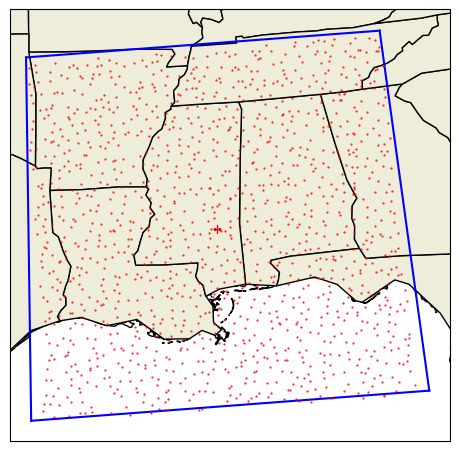

In [92]:
import cartopy.io.shapereader as shpreader

def colorize_state(geometry):
    facecolor = (0.93, 0.93, 0.85)
    return {'facecolor': facecolor, 'edgecolor': 'black'}

shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)

theproj = ccrs.LambertConformal() #choose another projection to obtain non-rectangular grid
ef, ax = plt.subplots(1,1, subplot_kw={'projection': theproj})#, 'axisbg': 'w'
ef.subplots_adjust(hspace=0.,wspace=0.,bottom=0.05,top=0.95,left=0.03,right=0.98)    
ax.coastlines()

ax.add_geometries(shpreader.Reader(states_shp).geometries(),ccrs.PlateCarree(),
                  styler=colorize_state)

#make the extent larger to see a margin outside of the domain
ax.set_extent([lonC.min()-0.5,lonC.max()+0.5,latC.min()-0.5,latC.max()+0.5])

ax.plot([lonC.min(),lonC.min()],[latC.min(),latC.max()], color='b', transform=ccrs.PlateCarree())
ax.plot([lonC.max(),lonC.max()],[latC.min(),latC.max()], color='b', transform=ccrs.PlateCarree())
ax.plot([lonC.min(),lonC.max()],[latC.min(),latC.min()], color='b', transform=ccrs.PlateCarree())
ax.plot([lonC.min(),lonC.max()],[latC.max(),latC.max()], color='b', transform=ccrs.PlateCarree())


ax.plot(lonC.mean(), latC.mean(), marker='+', c='r', transform=ccrs.PlateCarree())
for lon, lat in zip(lonC[::100], latC[::100]):
    ax.plot(lon, lat, c='r', marker='o', markersize=0.5, transform=ccrs.PlateCarree())

for x, y in zip(xC[::100], yC[::100]):
    lon, lat = ccrs.transform_point( x, y, src_crs=ccrs.PlateCarree())
    ax.plot(lon, lat, c='b', marker='o', markersize=0.5, transform=ccrs.PlateCarree())
